In [1]:
sys.path.append('/Users/liushuhan/Documents/AL_GNN/Experiments/RSP/Sythentic_graph')
sys.path.append('../')
from Generator import *
import cvxpy as cp


import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sb
import numpy as np
from scs import SCS
from osqp import OSQP

/Users/liushuhan/Documents/AL_GNN/Experiments/RSP/Sythentic_graph/Generator.py:79: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  node_mean = torch.tensor(group_mean[group_label[i],])


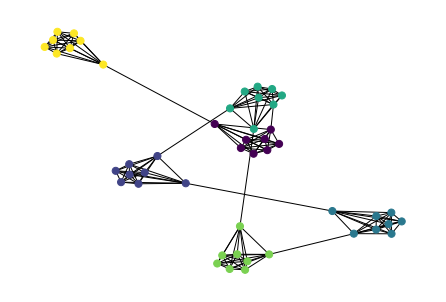

In [2]:
list_shapes = ['nx.complete_graph'] * 6
list_shapes_args = [[8]] * 6
graph_type = 'nx.connected_watts_strogatz_graph'
graph_args = [6, 2, 0.4]
G, Gg, group_label, shape_label, shape_dist = synthetic_graph_generator(list_shapes, list_shapes_args, graph_type, graph_args, \
    plot=True, plot_color='group_label', savefig=False, root=None, figname=None)
node_features, group_mean = synthetic_feature_generator(group_label, num_features=50, std=1.0, save=False, root=False) 
node_features = node_features.numpy()
group_mean = group_mean.numpy()

/Users/liushuhan/opt/anaconda3/lib/python3.9/site-packages/cvxpy/problems/problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


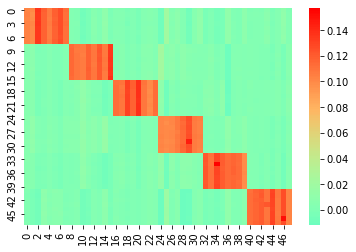

In [3]:
from util import *
from loss import *
from Estimator import *
L, D, Gamma = graph_to_mat(G)
ele = ElastEstimator(l1=15, l2=50, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', diag_pen=False)
ele.fit(node_features, maxiter=1000)
ele.heatplot()

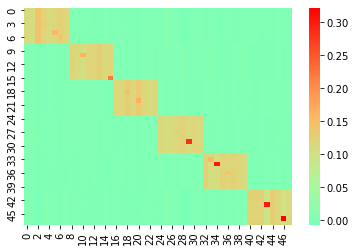

In [4]:
l1e = LassoEstimator(l1=10, l2=0, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', diag_pen=True)
l1e.fit(node_features, maxiter=1000)
l1e.heatplot()

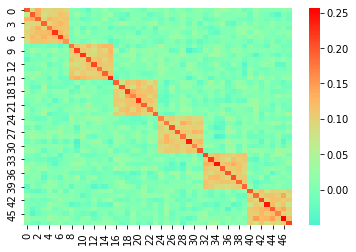

In [5]:
l2e = RidgeEstimator(l1=0, l2=50, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', diag_pen=True)
l2e.fit(node_features, maxiter=1000)
l2e.heatplot()

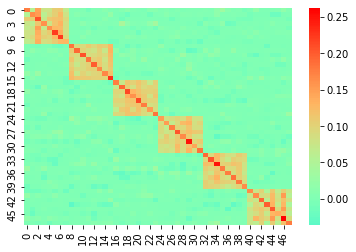

In [6]:
sele = sparseElastEstimator(l1=10, l2=50, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', diag_pen=True)
sele.fit(node_features, maxiter=1000)
sele.heatplot()

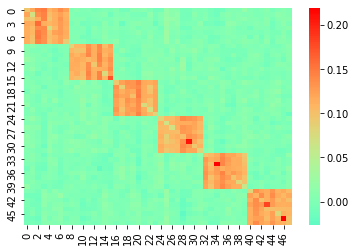

In [7]:
cele = correctedElastEstimator(l1=40, l2=100, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', diag_pen=False)
cele.fit(node_features, maxiter=1000)
cele.heatplot()